In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft

In [30]:
0.403*pow(1.0501, 4)

0.4900356545601427

In [32]:
500000/365

1369.86301369863

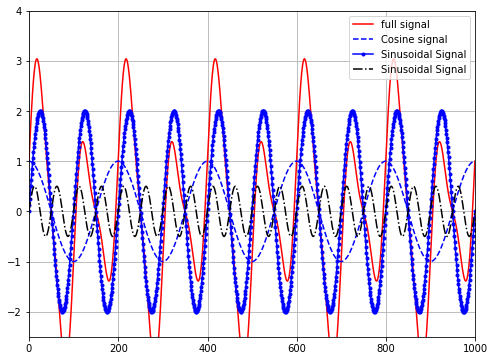

In [32]:
## setup for domain 
## number of points
n=1000
# distance (in meters ) or time period  (in seconds)
Lx=100
# angular frequency 
omg=2.0*np.pi/Lx

## Creating indiviuals signals 
x=np.linspace(0, Lx, n)
y1=1.0*np.cos(5.0*omg*x)
y2=2.0*np.sin(10.0*omg*x)
y3=0.5*np.sin(20.0*omg*x)

## ful signal 
y=y1 +y2 +y3
plt.figure(figsize=(8,6))
plt.plot(y, 'r-', label='full signal')
plt.plot(y1, 'b--', label='Cosine signal')
plt.plot(y2, '.b-', label='Sinusoidal Signal')
plt.plot(y3, 'k-.', label='Sinusoidal Signal')
plt.legend(loc='upper right')
plt.grid(True)
plt.axis([0,1000,-2.5,4])
plt.show()

In [33]:
## Preparatory Steps
## Creates all the necessary Frequencies 
freqs=fftfreq(n)

# mask array to be used for power spectra
# ignoring half the values , as they are complex conjucates of the other 
mask = freqs >0

## FFT and power spectra calculations
# fft values 
fft_vals=fft(y)

# true theoretical fft
fft_theo=2.0* np.abs(fft_vals/n)

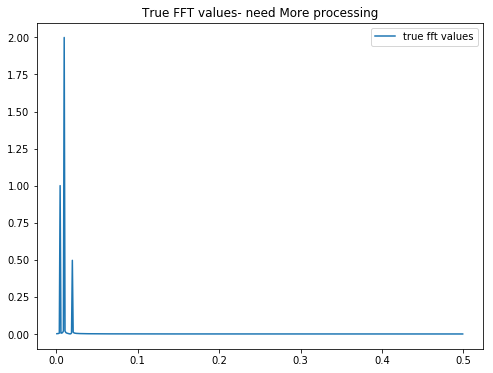

In [34]:
plt.figure(figsize=(8,6))
# plt.plot(freqs, fft_vals, label="raw fft values")
# plt.title('Raw FFT values')
plt.plot(freqs[mask], fft_theo[mask], label='true fft values')
plt.title("True FFT values- need More processing")
plt.legend(loc='upper right')
plt.show()

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [40]:
N = 812  # number of samples
M = 256  # length of Wiener filter
Om0 = 0.1*np.pi  # frequency of original signal
N0 = 0.1  # PSD of additive white noise

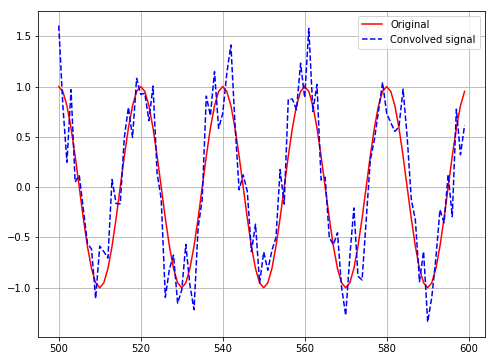

In [58]:
# generate original signal
s = np.cos(Om0 * np.arange(N))
# generate observed signal
g = 1/20*np.asarray([1, 2, 3, 4, 5, 4, 3, 2, 1])
n = np.random.normal(size=N, scale=np.sqrt(N0))
x = np.convolve(s, g, mode='same') + n
idx = np.arange(500, 600)
plt.figure(figsize=(8,6))
plt.plot(idx, s[idx], 'r-', label='Original')
plt.plot(idx, x[idx], 'b--', label='Convolved signal')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [46]:
# estimate (cross) PSDs using Welch technique
f, Pxx = sig.csd(x, x, nperseg=M)
f, Psx = sig.csd(s, x, nperseg=M)

In [93]:
H=Psx/Pxx
H = H * np.exp(-1j*2*np.pi/len(H)*np.arange(len(H))*(len(H)//2))  # shift for causal filter
h = np.fft.irfft(H)
y = np.convolve(x, h, mode='same')

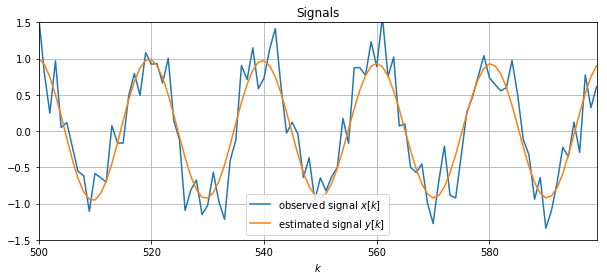

In [94]:
# plot signals
idx = np.arange(500, 600)
plt.figure(figsize=(10, 4))
plt.plot(idx, x[idx], label=r'observed signal $x[k]$')
#plt.plot(idx, s[idx], label=r'original signal $s[k]$')
plt.plot(idx, y[idx], label=r'estimated signal $y[k]$')
plt.title('Signals')
plt.xlabel(r'$k$')
plt.axis([idx[0], idx[-1], -1.5, 1.5])
plt.legend()
plt.grid()

In [74]:
import pandas as pd
data1=pd.read_csv('Daily_Residential_November.csv')

In [82]:
data=data1.iloc[:,1:]
Household_data=data.iloc[:24,:]
Household_values=Household_data.values
Household_seq=Household_values.T.flatten()
print(Household_seq.shape)

(720,)


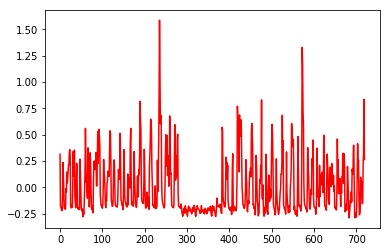

In [83]:
House_resi=Household_seq-Household_seq.mean()
plt.plot(House_resi, 'r-')
plt.show()

In [89]:
n1=len(House_resi)
freqs=fftfreq(n1)
# mask array to be used for power spectra
# ignoring half the values , as they are complex conjucates of the other 
mask = freqs >0

## FFT and power spectra calculations
# fft values 
fft_vals=fft(House_resi)

# true theoretical fft
fft_theo=2.0* np.abs(fft_vals/n1)

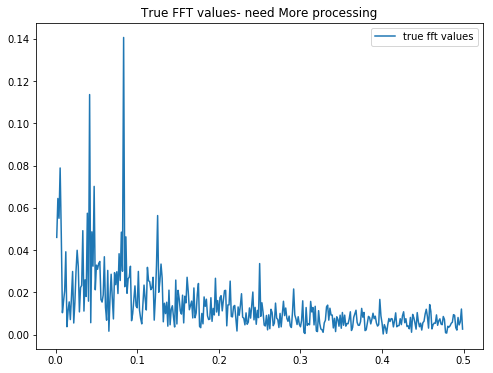

In [90]:
plt.figure(figsize=(8,6))
# plt.plot(freqs, fft_vals, label="raw fft values")
# plt.title('Raw FFT values')
plt.plot(freqs[mask], fft_theo[mask], label='true fft values')
plt.title("True FFT values- need More processing")
plt.legend(loc='upper right')
plt.show()

In [99]:
from scipy import*
def fourier_work(Y,x, N):
    total = 0
    for ctr in range(len(Y)):
        total += Y[ctr] * (np.cos(x*ctr*2*np.pi/N) + 1j*np.sin(x*ctr*2*np.pi/N))
    return real(total)

In [103]:
Houshold_reconst= [fourier_work(fft_theo, x, n1) for x in xs]

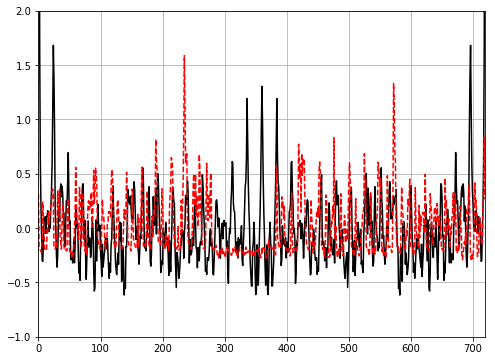

In [108]:
xs = range(n1)
plt.figure(figsize=(8,6))
plt.plot(Houshold_reconst, 'k-')
plt.plot(House_resi, 'r--')
plt.axis([0,719,-1.0,2])
plt.grid(True)
plt.show()